In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import json, os
import string
from sklearn.metrics import confusion_matrix, classification_report
max_len = 16

In [19]:
def get_f1s(cm):
    p = [cm[i][i]/(0.00001+cm[i][i]+cm[i][i-1]) for i in range(2)]
    r = [cm[i][i]/(0.00001+cm[i][i]+cm[i-1][i]) for i in range(2)]
    return [2*pp*rr/(pp+rr+0.00001) for pp, rr in zip(p, r)]

In [20]:
def get_maj_f1(cm):
    return get_f1s([[cm[0][0]+cm[0][1], cm[1][0]+cm[1][1]], [0,0]])

In [21]:
def get_rand_f1(cm):
    return get_f1s([[(cm[0][0]+cm[0][1])//2, (cm[0][1]+cm[0][1])//2]]*2)

In [22]:
sum_ct = lambda x: x[0][0] + x[0][1] + x[1][0] + x[1][1]


In [23]:
pred_folders = ["savefolder/"+x for x in os.listdir("savefolder") if 'prd.gpt-j-6B' in x and x.split('.')[-2].endswith('0001')]
control_folders = ["savefolder/"+x for x in os.listdir("savefolder") if 'ctl.gpt-j-6B' in x and x.split('.')[-2].endswith('0001')]


In [24]:
this_f1, this_pos_f1, valid, control_f1, control_pos_f1, num_data, num_data_pos = [{c: 0
                                        for c in string.ascii_lowercase
                                    } for _ in range(7)]
tp_num, fn_num, acc, ctl_tp_num, ctl_fn_num, ctl_acc = [{c: {i: 0 for i in range(max_len)}
                        for c in string.ascii_lowercase} for _ in range(6)]
tp_eg, _, fn_eg, _ = [{c: {i: [] for i in range(max_len)}
                        for c in string.ascii_lowercase} for _ in range(4)]


In [25]:
for c in string.ascii_lowercase:
    for folder in pred_folders:
        gts, prds, _, wds, _ = json.load(open(folder + '/preds_' + c + '.json'))

        for g,p,w in zip(gts, prds, wds):
            if g == 1 and p == 1:
                if len(tp_eg[c][min(max_len-1,w.lower().index(c))]) < 5:
                    tp_eg[c][min(max_len-1,w.lower().index(c))].append((w,g,p))
                tp_num[c][min(max_len-1,w.lower().index(c))] += 1
            if g == 0 and p == 1:
                if len(fn_eg[c][min(max_len-1,w.lower().index(c))]) < 5:
                    fn_eg[c][min(max_len-1,w.lower().index(c))].append((w,g,p))
                fn_num[c][min(max_len-1,w.lower().index(c))] += 1

    num_data[c] = {i: (tp_num[c][i] + fn_num[c][i]) for i in range(max_len)}
    for i in range(max_len):
        acc[c][i] = tp_num[c][i]/ (tp_num[c][i] + fn_num[c][i] + 0.000001)

    for control_folder in control_folders:
        gts, prds, _, wds, _ = json.load(open(control_folder + '/preds_' + c + '.json'))

        for g,p,w in zip(gts, prds, wds):
            if g == 1 and p == 1:
                ctl_tp_num[c][min(max_len-1,w.lower().index(c))] += 1
            if g == 0 and p == 1:
                ctl_fn_num[c][min(max_len-1,w.lower().index(c))] += 1

    for i in range(max_len):
        ctl_acc[c][i] = ctl_tp_num[c][i]/ (ctl_tp_num[c][i] + ctl_fn_num[c][i] + 0.000001)


In [26]:
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams.update({'font.size': 22})


In [27]:
tp_num['a'][2], fn_num['a'][2], tp_eg['a'][2], fn_eg['a'][2], ctl_tp_num['a'][2], ctl_fn_num['a'][2], 


(4837,
 565,
 [('ĠRadeon', 1, 1),
  ('ĠGang', 1, 1),
  ('oda', 1, 1),
  ('Exactly', 1, 1),
  ('ĠSands', 1, 1)],
 [('itamin', 0, 1),
  ('Ġvalves', 0, 1),
  ('Ġsacks', 0, 1),
  ('Ġdark', 0, 1),
  ('Ġwaiting', 0, 1)],
 2448,
 1847)

acc {'a': 97.0, 'b': 95.3, 'c': 91.33, 'd': 93.23, 'e': 94.12, 'f': 98.8, 'g': 95.22, 'h': 95.36, 'i': 97.18, 'j': 98.48, 'k': 99.0, 'l': 93.79, 'm': 96.44, 'n': 86.86, 'o': 94.77, 'p': 96.49, 'q': 95.35, 'r': 96.72, 's': 93.97, 't': 93.75, 'u': 93.83, 'v': 98.65, 'w': 95.53, 'x': 93.33, 'y': 91.89, 'z': 100.0} , Aggr: 95.3

ctl_acc {'a': 55.91, 'b': 50.0, 'c': 47.63, 'd': 42.62, 'e': 49.37, 'f': 50.0, 'g': 49.51, 'h': 48.5, 'i': 53.78, 'j': 61.54, 'k': 54.67, 'l': 54.11, 'm': 46.28, 'n': 47.21, 'o': 47.77, 'p': 56.08, 'q': 30.3, 'r': 50.43, 's': 51.7, 't': 57.14, 'u': 48.41, 'v': 50.69, 'w': 54.34, 'x': 60.53, 'y': 48.0, 'z': 46.81} , Aggr: 51.37

tp {'a': (1684, [('arella', 1, 1), ('achable', 1, 1), ('arers', 1, 1), ('apped', 1, 1), ('APTER', 1, 1)]), 'b': (345, [('bit', 1, 1), ('Back', 1, 1), ('BB', 1, 1), ('bett', 1, 1), ('builder', 1, 1)]), 'c': (569, [('CD', 1, 1), ('catch', 1, 1), ('cht', 1, 1), ('Coun', 1, 1), ('channel', 1, 1)]), 'd': (248, [('done', 1, 1), ('does', 1, 1), ('d

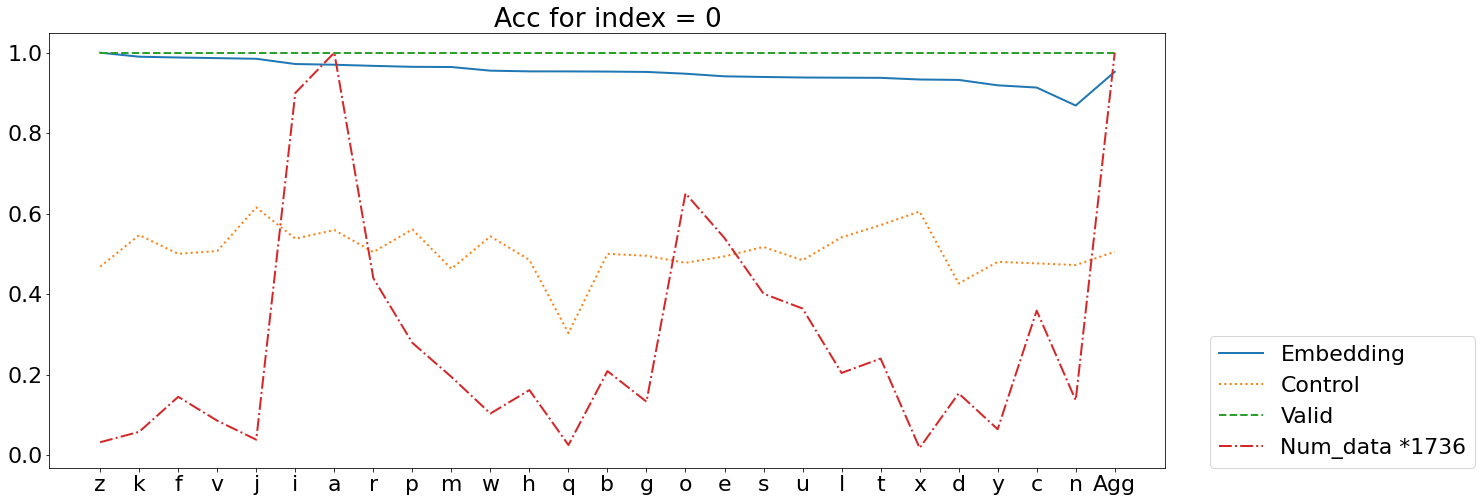

acc {'a': 92.78, 'b': 93.28, 'c': 93.28, 'd': 92.75, 'e': 89.67, 'f': 98.0, 'g': 93.74, 'h': 92.1, 'i': 93.25, 'j': 100.0, 'k': 98.46, 'l': 93.2, 'm': 96.57, 'n': 90.14, 'o': 91.98, 'p': 96.43, 'q': 94.34, 'r': 96.17, 's': 94.71, 't': 93.12, 'u': 88.15, 'v': 98.68, 'w': 95.66, 'x': 97.83, 'y': 94.42, 'z': 98.9} , Aggr: 93.49

ctl_acc {'a': 56.71, 'b': 52.29, 'c': 48.8, 'd': 50.85, 'e': 48.17, 'f': 50.48, 'g': 47.83, 'h': 51.31, 'i': 52.36, 'j': 62.63, 'k': 55.4, 'l': 52.99, 'm': 47.83, 'n': 55.36, 'o': 48.29, 'p': 57.07, 'q': 41.57, 'r': 50.69, 's': 52.87, 't': 55.24, 'u': 45.58, 'v': 53.79, 'w': 55.31, 'x': 43.48, 'y': 55.37, 'z': 49.23} , Aggr: 51.85

tp {'a': (3252, [('jad', 1, 1), ('rador', 1, 1), ('ĠAwakens', 1, 1), ('Ġaug', 1, 1), ('Ġambient', 1, 1)]), 'b': (1111, [('Ġbase', 1, 1), ('Ġbanning', 1, 1), ('obile', 1, 1), ('Ġblat', 1, 1), ('Ġbruising', 1, 1)]), 'c': (2609, [('Ġcommunal', 1, 1), ('nce', 1, 1), ('Ġcock', 1, 1), ('ĠCounter', 1, 1), ('Ġconstruct', 1, 1)]), 'd': (1613, [(

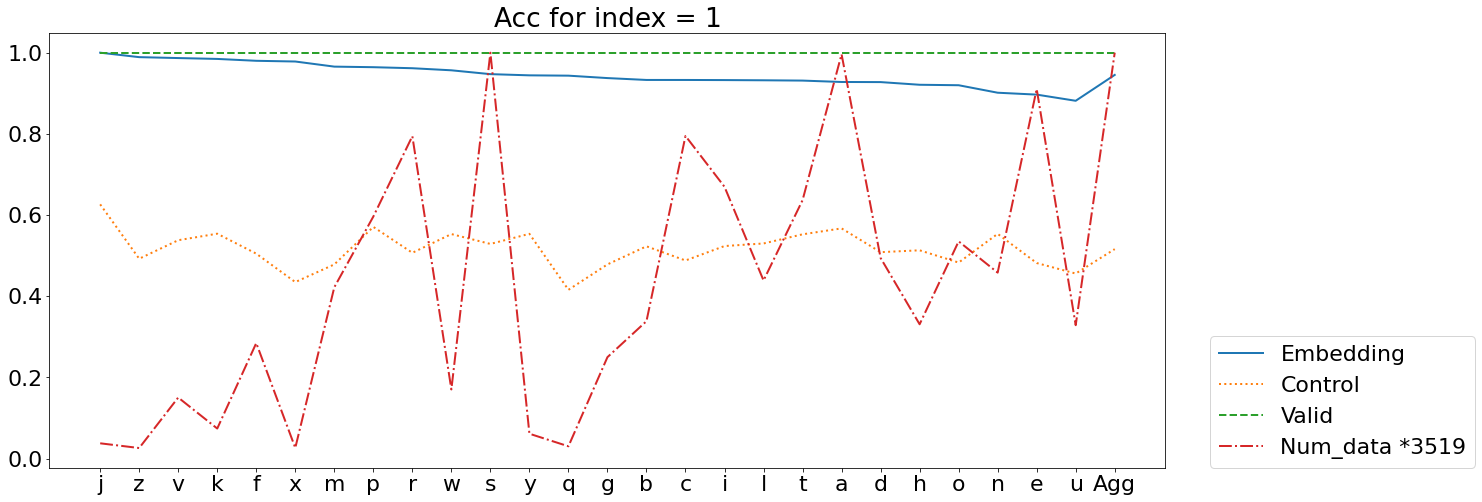

acc {'a': 89.54, 'b': 89.23, 'c': 87.18, 'd': 91.17, 'e': 88.7, 'f': 89.69, 'g': 89.86, 'h': 94.22, 'i': 90.91, 'j': 85.19, 'k': 97.74, 'l': 92.7, 'm': 95.6, 'n': 89.86, 'o': 89.98, 'p': 93.44, 'q': 97.94, 'r': 92.81, 's': 91.58, 't': 90.3, 'u': 84.9, 'v': 93.98, 'w': 95.29, 'x': 98.43, 'y': 94.58, 'z': 100.0} , Aggr: 90.52

ctl_acc {'a': 57.0, 'b': 50.72, 'c': 49.6, 'd': 47.93, 'e': 50.59, 'f': 50.29, 'g': 48.59, 'h': 54.0, 'i': 53.35, 'j': 81.25, 'k': 54.3, 'l': 52.17, 'm': 46.25, 'n': 52.59, 'o': 49.38, 'p': 55.82, 'q': 42.31, 'r': 49.35, 's': 47.97, 't': 53.85, 'u': 45.17, 'v': 54.22, 'w': 54.82, 'x': 47.8, 'y': 50.9, 'z': 24.0} , Aggr: 51.42

tp {'a': (4837, [('ĠRadeon', 1, 1), ('ĠGang', 1, 1), ('oda', 1, 1), ('Exactly', 1, 1), ('ĠSands', 1, 1)]), 'b': (373, [('taboola', 1, 1), ('Ġabolish', 1, 1), ('album', 1, 1), ('robat', 1, 1), ('ributes', 1, 1)]), 'c': (952, [('increasing', 1, 1), ('incent', 1, 1), ('Incre', 1, 1), ('rocal', 1, 1), ('Ġscrewed', 1, 1)]), 'd': (671, [('Ġadept', 

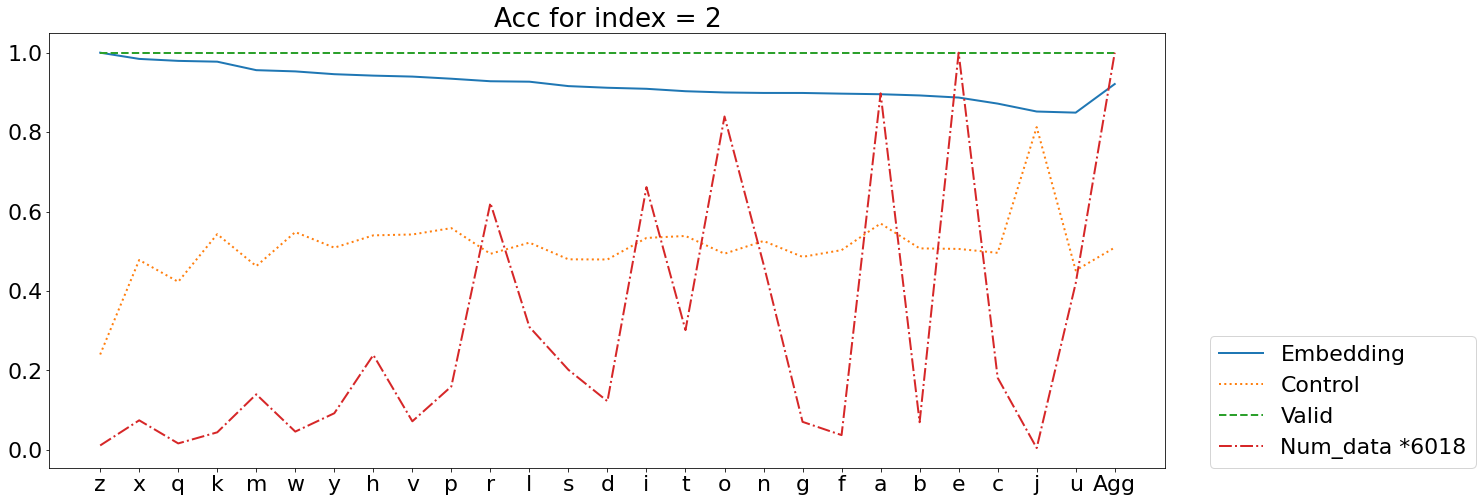

acc {'a': 81.82, 'b': 91.77, 'c': 84.0, 'd': 86.37, 'e': 85.21, 'f': 93.98, 'g': 87.58, 'h': 86.12, 'i': 86.48, 'j': 91.82, 'k': 96.92, 'l': 91.55, 'm': 95.26, 'n': 87.74, 'o': 84.25, 'p': 91.8, 'q': 95.89, 'r': 92.47, 's': 90.74, 't': 89.23, 'u': 77.8, 'v': 93.76, 'w': 95.92, 'x': 91.49, 'y': 91.86, 'z': 95.65} , Aggr: 88.2

ctl_acc {'a': 56.88, 'b': 52.33, 'c': 49.73, 'd': 49.86, 'e': 49.96, 'f': 50.51, 'g': 49.93, 'h': 52.0, 'i': 51.45, 'j': 72.5, 'k': 55.86, 'l': 52.45, 'm': 46.99, 'n': 52.39, 'o': 48.23, 'p': 61.17, 'q': 46.77, 'r': 49.48, 's': 50.83, 't': 55.39, 'u': 46.83, 'v': 52.76, 'w': 52.4, 'x': 52.24, 'y': 55.08, 'z': 36.97} , Aggr: 51.77

tp {'a': (2520, [('Ġexample', 1, 1), ('Ġtransact', 1, 1), ('Ġglaring', 1, 1), ('inia', 1, 1), ('Ġscattering', 1, 1)]), 'b': (647, [('orable', 1, 1), ('Ġtube', 1, 1), ('Ġdebacle', 1, 1), ('ĠRibbon', 1, 1), ('ĠCuba', 1, 1)]), 'c': (1396, [('Ġrecreation', 1, 1), ('practice', 1, 1), ('Ġpictured', 1, 1), ('Ġfac', 1, 1), ('ĠPAC', 1, 1)]), 'd':

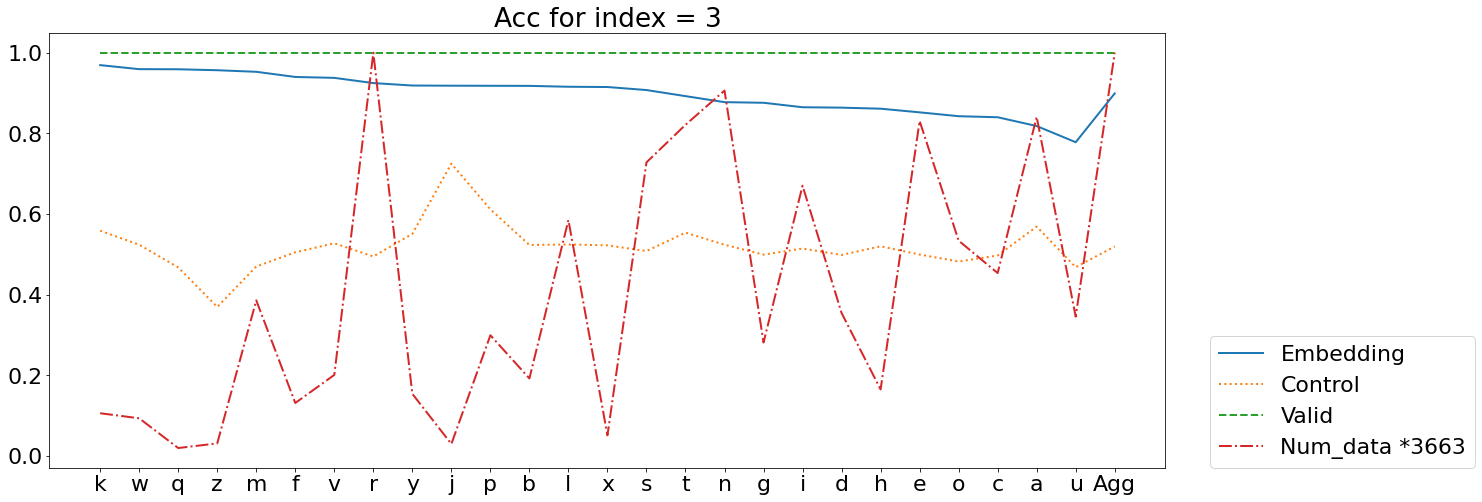

acc {'a': 76.67, 'b': 87.99, 'c': 78.17, 'd': 82.11, 'e': 80.29, 'f': 89.19, 'g': 84.06, 'h': 88.12, 'i': 87.32, 'j': 89.58, 'k': 95.94, 'l': 88.53, 'm': 94.98, 'n': 85.04, 'o': 83.58, 'p': 88.4, 'q': 86.89, 'r': 89.25, 's': 90.8, 't': 87.96, 'u': 75.24, 'v': 89.95, 'w': 95.08, 'x': 87.69, 'y': 90.06, 'z': 83.56} , Aggr: 85.53

ctl_acc {'a': 56.02, 'b': 49.67, 'c': 48.57, 'd': 47.52, 'e': 50.13, 'f': 55.42, 'g': 49.07, 'h': 52.56, 'i': 52.65, 'j': 59.26, 'k': 53.59, 'l': 52.68, 'm': 46.59, 'n': 52.32, 'o': 49.27, 'p': 55.93, 'q': 40.0, 'r': 49.1, 's': 51.98, 't': 53.72, 'u': 48.21, 'v': 51.19, 'w': 56.16, 'x': 57.89, 'y': 60.5, 'z': 48.44} , Aggr: 51.5

tp {'a': (1226, [('ĠPenal', 1, 1), ('ĠMesa', 1, 1), ('ĠDisabled', 1, 1), ('ĠNepal', 1, 1), ('Ġherald', 1, 1)]), 'b': (315, [('Ġcarbohyd', 1, 1), ('Ġdiabetic', 1, 1), ('Republicans', 1, 1), ('ĠStab', 1, 1), ('Ġviable', 1, 1)]), 'c': (949, [('ĠHitchcock', 1, 1), ('ellect', 1, 1), ('ĠGarcia', 1, 1), ('Ġevacuation', 1, 1), ('Ġproclamation',

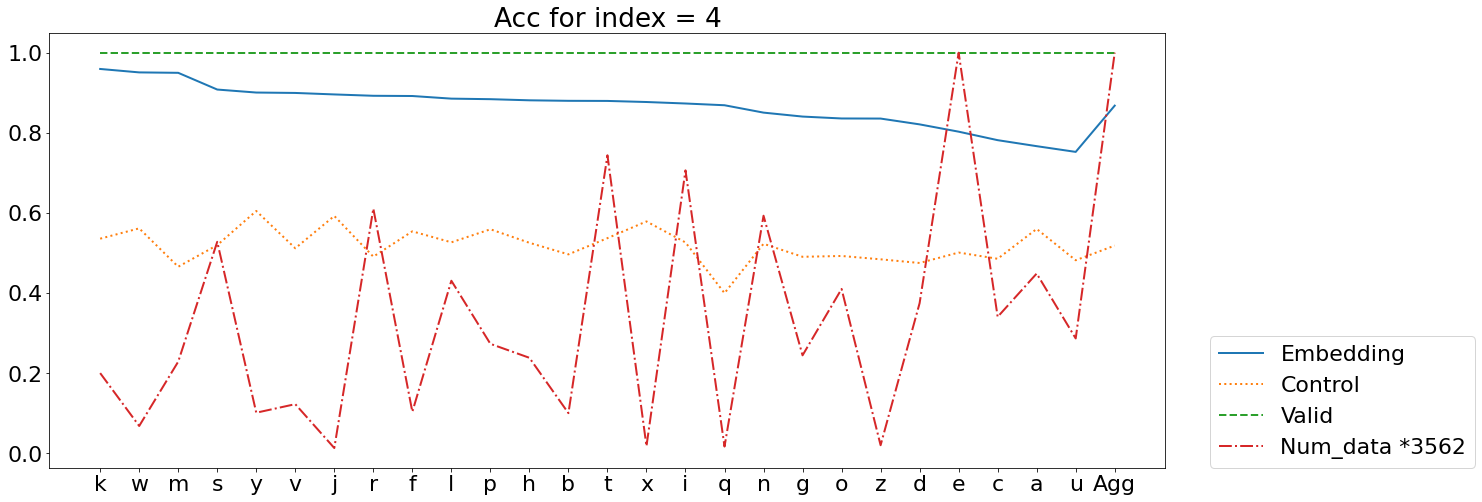

acc {'a': 76.02, 'b': 80.15, 'c': 75.43, 'd': 83.77, 'e': 81.69, 'f': 93.5, 'g': 88.36, 'h': 83.82, 'i': 86.43, 'j': 50.0, 'k': 96.7, 'l': 85.97, 'm': 92.14, 'n': 84.36, 'o': 81.88, 'p': 82.95, 'q': 100.0, 'r': 88.3, 's': 91.35, 't': 84.57, 'u': 73.34, 'v': 90.52, 'w': 92.91, 'x': 95.35, 'y': 92.49, 'z': 64.91} , Aggr: 84.6

ctl_acc {'a': 55.33, 'b': 46.57, 'c': 51.47, 'd': 53.36, 'e': 51.66, 'f': 54.04, 'g': 46.25, 'h': 51.99, 'i': 53.93, 'j': 66.67, 'k': 61.89, 'l': 50.86, 'm': 47.7, 'n': 54.22, 'o': 49.84, 'p': 58.19, 'q': 36.36, 'r': 48.83, 's': 52.36, 't': 54.22, 'u': 43.89, 'v': 51.92, 'w': 52.31, 'x': 48.39, 'y': 50.0, 'z': 35.14} , Aggr: 51.86

tp {'a': (986, [('initial', 1, 1), ('estival', 1, 1), ('Ġfirearm', 1, 1), ('Ġextrad', 1, 1), ('Ġoperating', 1, 1)]), 'b': (214, [('Ġtoolbar', 1, 1), ('Ġdeliber', 1, 1), ('Ġstumbled', 1, 1), ('Ġtroubles', 1, 1), ('remember', 1, 1)]), 'c': (620, [('Ġinsect', 1, 1), ('Ġfiasco', 1, 1), ('ĠBasic', 1, 1), ('ethnic', 1, 1), ('Ġprinciple', 1, 1)

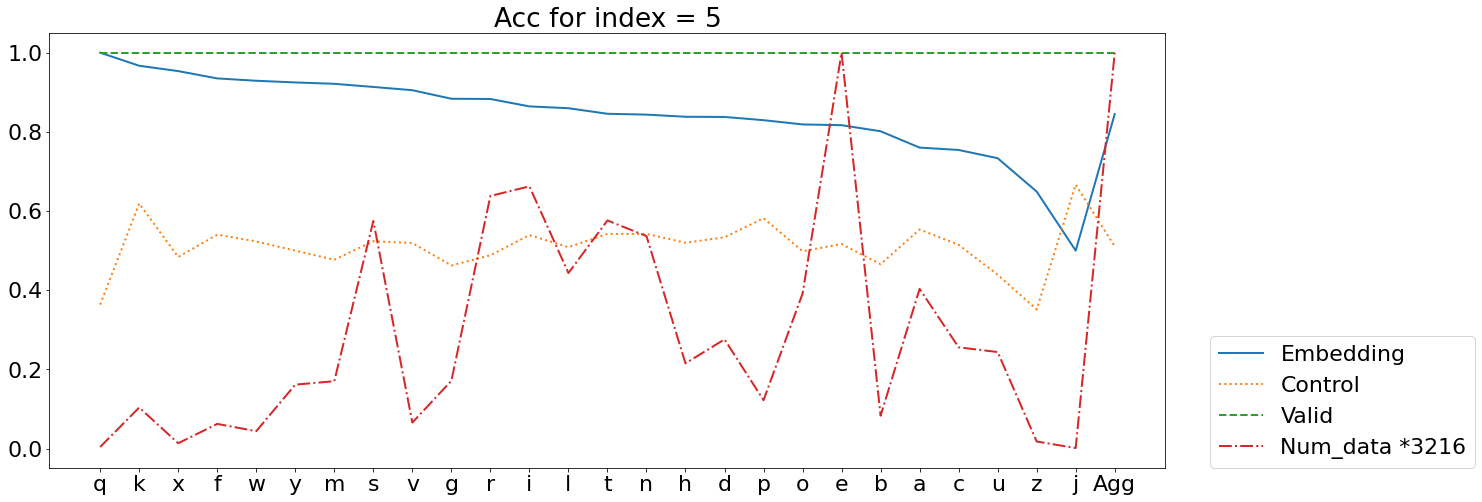

acc {'a': 77.08, 'b': 87.43, 'c': 78.51, 'd': 81.7, 'e': 80.16, 'f': 94.27, 'g': 85.99, 'h': 86.35, 'i': 88.19, 'j': 0.0, 'k': 89.86, 'l': 86.05, 'm': 91.32, 'n': 84.85, 'o': 84.35, 'p': 87.28, 'q': 88.0, 'r': 89.02, 's': 91.64, 't': 85.33, 'u': 71.14, 'v': 89.57, 'w': 89.76, 'x': 89.29, 'y': 91.28, 'z': 85.71} , Aggr: 85.25

ctl_acc {'a': 55.22, 'b': 55.97, 'c': 51.01, 'd': 48.26, 'e': 51.01, 'f': 49.01, 'g': 49.9, 'h': 49.78, 'i': 51.12, 'j': 0.0, 'k': 56.36, 'l': 54.23, 'm': 48.23, 'n': 53.01, 'o': 48.21, 'p': 62.79, 'q': 46.15, 'r': 50.28, 's': 50.97, 't': 54.44, 'u': 42.12, 'v': 53.67, 'w': 53.01, 'x': 69.23, 'y': 49.15, 'z': 44.44} , Aggr: 51.61

tp {'a': (760, [('Ġrecreation', 1, 1), ('Ġdominated', 1, 1), ('Ġdoorway', 1, 1), ('ĠXperia', 1, 1), ('Ġcrystall', 1, 1)]), 'b': (153, [('ĠRemember', 1, 1), ('ĠStrawberry', 1, 1), ('ĠAttributes', 1, 1), ('Ġcollaborating', 1, 1), ('Ġmicrobi', 1, 1)]), 'c': (453, [('Distance', 1, 1), ('Ġenhance', 1, 1), ('ĠAntioch', 1, 1), ('Ġtransc', 1, 1)

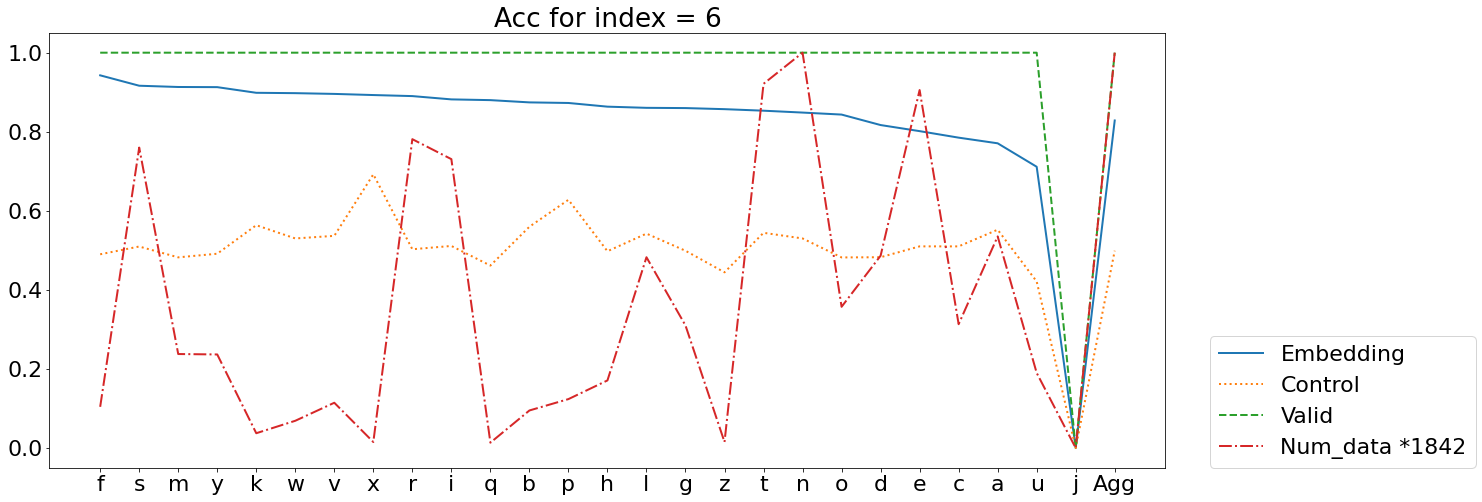

acc {'a': 78.74, 'b': 78.26, 'c': 75.28, 'd': 88.93, 'e': 84.28, 'f': 94.92, 'g': 89.58, 'h': 80.0, 'i': 89.74, 'j': 0.0, 'k': 86.49, 'l': 86.4, 'm': 90.48, 'n': 86.07, 'o': 81.27, 'p': 79.67, 'q': 100.0, 'r': 89.0, 's': 92.73, 't': 85.09, 'u': 72.34, 'v': 86.46, 'w': 91.67, 'x': 73.68, 'y': 90.97, 'z': 98.21} , Aggr: 86.07

ctl_acc {'a': 55.54, 'b': 45.57, 'c': 49.01, 'd': 52.97, 'e': 54.24, 'f': 45.71, 'g': 45.42, 'h': 57.26, 'i': 52.76, 'j': 0.0, 'k': 53.85, 'l': 51.24, 'm': 53.4, 'n': 50.0, 'o': 49.07, 'p': 63.16, 'q': 50.0, 'r': 48.94, 's': 51.92, 't': 54.0, 'u': 40.0, 'v': 56.96, 'w': 42.31, 'x': 47.06, 'y': 56.56, 'z': 48.72} , Aggr: 51.72

tp {'a': (563, [('ĠInformation', 1, 1), ('Ġcelebrate', 1, 1), ('ĠImportant', 1, 1), ('ĠVertical', 1, 1), ('Ġreversal', 1, 1)]), 'b': (90, [('Ġenjoyable', 1, 1), ('Ġequilibrium', 1, 1), ('Ġvegetables', 1, 1), ('Ġproverb', 1, 1), ('Ġvolleyball', 1, 1)]), 'c': (265, [('Ġartifact', 1, 1), ('Ġdestructive', 1, 1), ('Ġdistracting', 1, 1), ('Ġentrenc

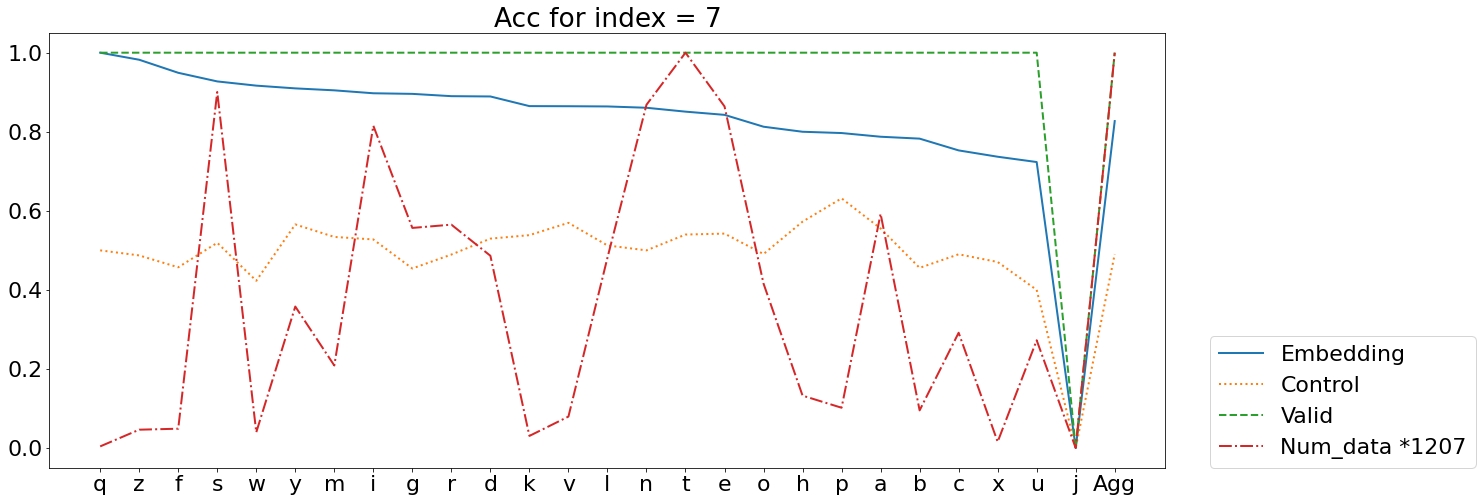

acc {'a': 74.93, 'b': 81.61, 'c': 68.05, 'd': 90.98, 'e': 80.93, 'f': 90.62, 'g': 90.47, 'h': 85.59, 'i': 90.81, 'j': 100.0, 'k': 90.0, 'l': 84.15, 'm': 91.07, 'n': 86.21, 'o': 75.33, 'p': 68.09, 'q': 0.0, 'r': 84.66, 's': 91.88, 't': 83.38, 'u': 68.55, 'v': 85.42, 'w': 73.91, 'x': 50.0, 'y': 92.41, 'z': 100.0} , Aggr: 84.81

ctl_acc {'a': 59.38, 'b': 44.0, 'c': 48.78, 'd': 49.49, 'e': 46.95, 'f': 53.85, 'g': 46.09, 'h': 48.1, 'i': 47.14, 'j': 50.0, 'k': 61.22, 'l': 49.14, 'm': 47.37, 'n': 56.29, 'o': 48.83, 'p': 53.85, 'q': 0.0, 'r': 50.68, 's': 49.64, 't': 59.23, 'u': 41.44, 'v': 61.4, 'w': 70.0, 'x': 30.0, 'y': 52.87, 'z': 52.78} , Aggr: 51.3

tp {'a': (278, [('ĠCompensation', 1, 1), ('Ġconsultations', 1, 1), ('Ġmisdemeanor', 1, 1), ('Ġdiscouraged', 1, 1), ('Ġmenstrual', 1, 1)]), 'b': (71, [('Ġlightsaber', 1, 1), ('Ġprofitable', 1, 1), ('Ġachievable', 1, 1), ('Ġreversible', 1, 1), ('Ġcompatible', 1, 1)]), 'c': (181, [('Ġdiabetic', 1, 1), ('Ġperiodically', 1, 1), ('Ġdiplomacy', 1, 1)

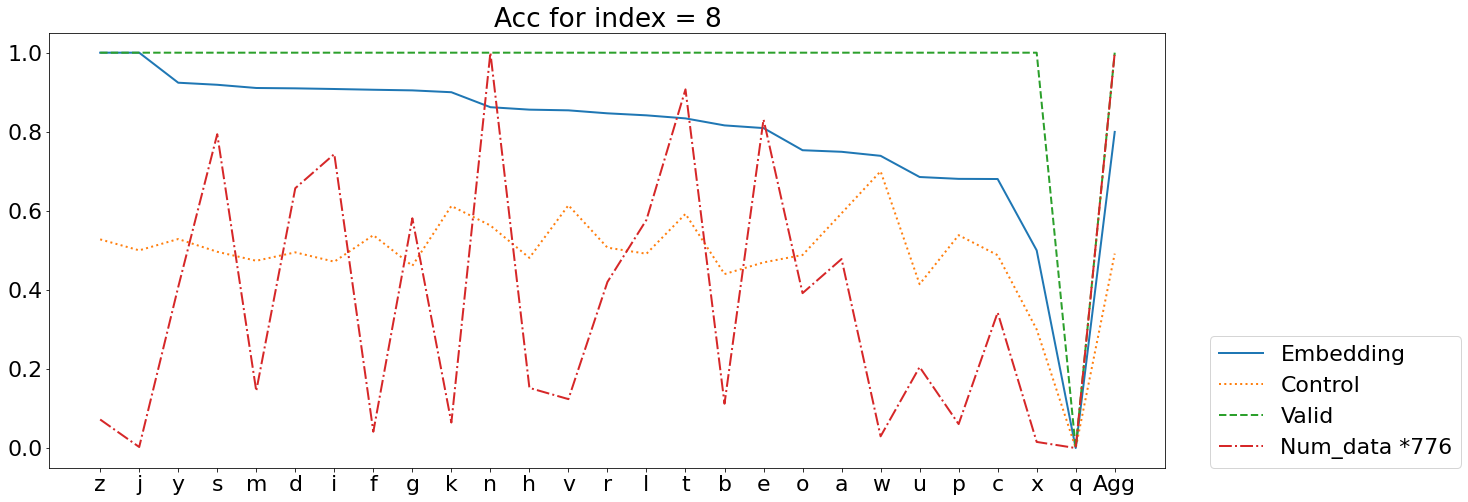

acc {'a': 84.31, 'b': 87.88, 'c': 71.05, 'd': 87.76, 'e': 81.36, 'f': 100.0, 'g': 90.75, 'h': 74.42, 'i': 93.63, 'j': 0.0, 'k': 84.62, 'l': 85.94, 'm': 83.58, 'n': 89.29, 'o': 79.45, 'p': 78.26, 'q': 0.0, 'r': 84.34, 's': 92.0, 't': 86.06, 'u': 56.76, 'v': 90.32, 'w': 70.0, 'x': 100.0, 'y': 94.52, 'z': 100.0} , Aggr: 86.32

ctl_acc {'a': 55.88, 'b': 47.62, 'c': 48.21, 'd': 48.96, 'e': 49.27, 'f': 42.86, 'g': 53.3, 'h': 51.61, 'i': 56.06, 'j': 0.0, 'k': 64.29, 'l': 46.39, 'm': 46.15, 'n': 52.99, 'o': 44.89, 'p': 61.11, 'q': 0.0, 'r': 49.37, 's': 46.37, 't': 52.34, 'u': 35.71, 'v': 57.5, 'w': 55.56, 'x': 0.0, 'y': 55.15, 'z': 75.0} , Aggr: 50.78

tp {'a': (231, [('ĠCertificate', 1, 1), ('Ġinvestigative', 1, 1), ('ĠRepublicans', 1, 1), ('Ġprovincial', 1, 1), ('Ġdeterioration', 1, 1)]), 'b': (29, [('Ġresponsibly', 1, 1), ('Ġfashionable', 1, 1), ('Ġunstoppable', 1, 1), ('Ġresponsible', 1, 1), ('Ġredistributed', 1, 1)]), 'c': (81, [('Ġpatriotic', 1, 1), ('Ġhydraulic', 1, 1), ('Ġappearance', 

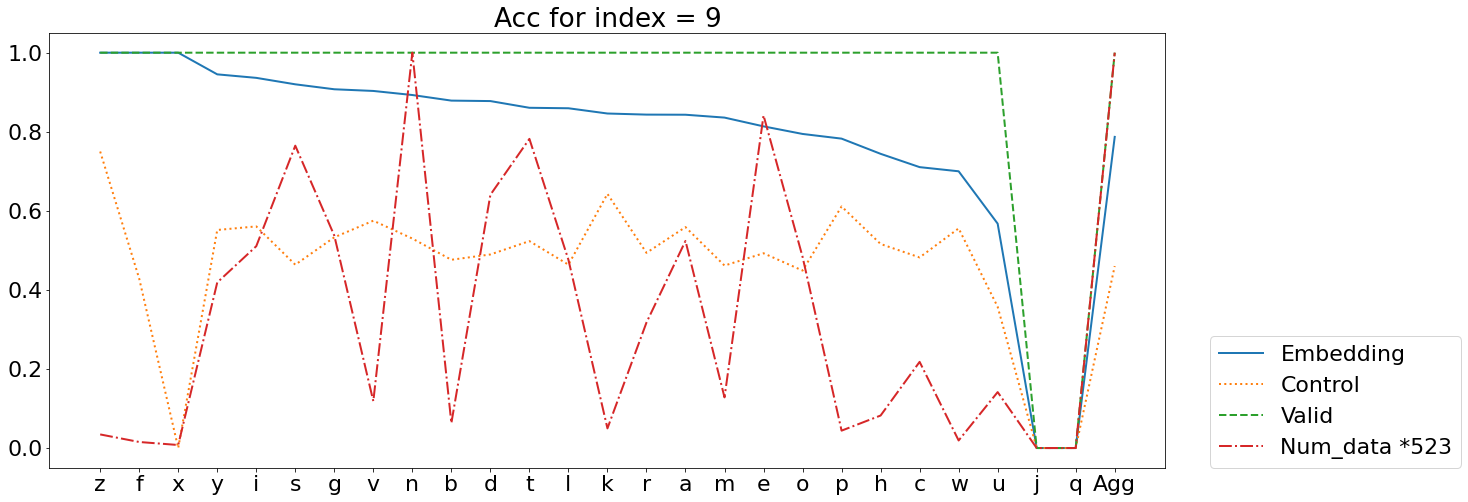

acc {'a': 76.04, 'b': 100.0, 'c': 67.16, 'd': 88.89, 'e': 82.32, 'f': 50.0, 'g': 97.63, 'h': 88.24, 'i': 87.88, 'j': 0.0, 'k': 71.43, 'l': 90.29, 'm': 86.21, 'n': 90.09, 'o': 81.94, 'p': 89.47, 'q': 0.0, 'r': 88.18, 's': 97.86, 't': 84.75, 'u': 76.67, 'v': 88.24, 'w': 100.0, 'x': 0.0, 'y': 92.9, 'z': 90.0} , Aggr: 88.43

ctl_acc {'a': 67.57, 'b': 61.54, 'c': 48.84, 'd': 54.76, 'e': 51.33, 'f': 80.0, 'g': 50.0, 'h': 42.86, 'i': 50.0, 'j': 0.0, 'k': 57.14, 'l': 60.98, 'm': 39.13, 'n': 48.69, 'o': 50.0, 'p': 36.36, 'q': 0.0, 'r': 49.12, 's': 55.71, 't': 53.77, 'u': 33.33, 'v': 53.85, 'w': 0.0, 'x': 100.0, 'y': 62.82, 'z': 60.0} , Aggr: 53.5

tp {'a': (73, [('ForgeModLoader', 1, 1), ('Ġmicrobiota', 1, 1), ('ĠIdentification', 1, 1), ('Ġunequivocally', 1, 1), ('Ġsophistication', 1, 1)]), 'b': (15, [('Ġidentifiable', 1, 1), ('Ġunacceptable', 1, 1), ('Ġirresistible', 1, 1), ('Ġquestionable', 1, 1), ('Ġdownloadable', 1, 1)]), 'c': (45, [('Ġdiplomatic', 1, 1), ('Ġdisturbance', 1, 1), ('Ġastronom

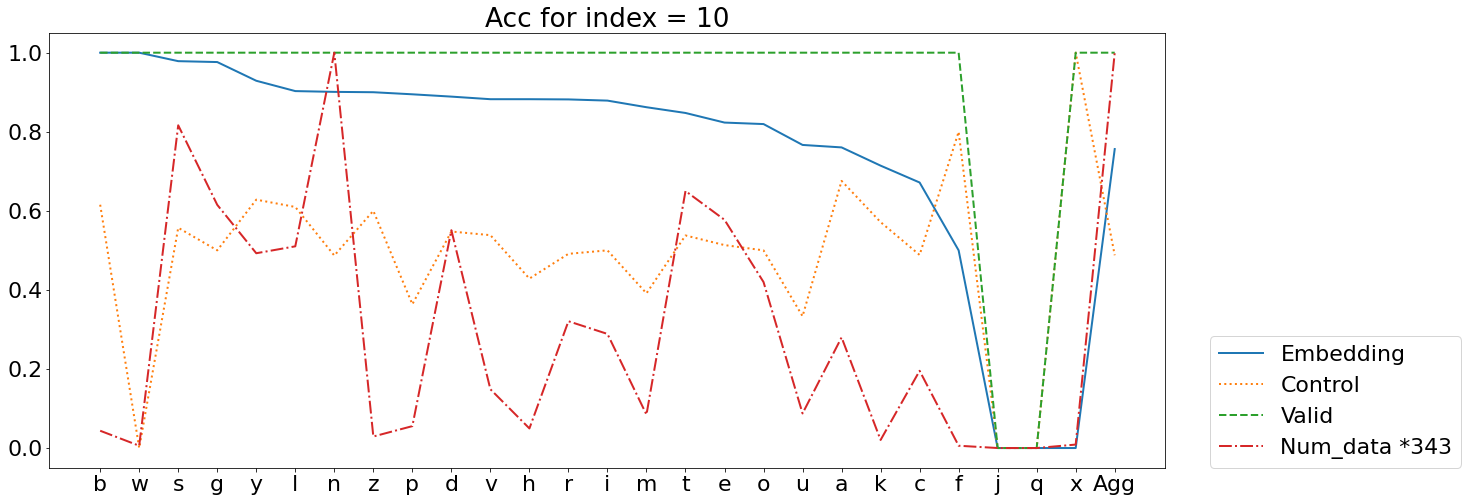

acc {'a': 89.09, 'b': 80.0, 'c': 56.52, 'd': 90.67, 'e': 83.05, 'f': 0.0, 'g': 95.54, 'h': 70.0, 'i': 83.1, 'j': 0.0, 'k': 88.89, 'l': 92.45, 'm': 88.24, 'n': 89.27, 'o': 84.15, 'p': 70.0, 'q': 0.0, 'r': 83.33, 's': 97.95, 't': 89.47, 'u': 100.0, 'v': 85.71, 'w': 0.0, 'x': 0.0, 'y': 95.8, 'z': 0.0} , Aggr: 89.6

ctl_acc {'a': 64.71, 'b': 60.0, 'c': 44.83, 'd': 41.38, 'e': 49.43, 'f': 0.0, 'g': 48.45, 'h': 42.86, 'i': 43.33, 'j': 0.0, 'k': 75.0, 'l': 47.22, 'm': 11.11, 'n': 54.14, 'o': 47.56, 'p': 60.0, 'q': 0.0, 'r': 36.84, 's': 50.0, 't': 59.26, 'u': 50.0, 'v': 50.0, 'w': 0.0, 'x': 0.0, 'y': 54.64, 'z': 100.0} , Aggr: 50.61

tp {'a': (49, [('Ġunderestimated', 1, 1), ('Ġsupplemental', 1, 1), ('Ġintellectuals', 1, 1), ('Ġcomplimentary', 1, 1), ('Ġelectronically', 1, 1)]), 'b': (4, [('Ġunforgettable', 1, 1), ('Ġirresponsible', 1, 1), ('Ġunforgettable', 1, 1), ('Ġirresponsible', 1, 1)]), 'c': (13, [('Ġunrealistic', 1, 1), ('Ġproblematic', 1, 1), ('Ġprehistoric', 1, 1), ('Ġsympathetic', 1,

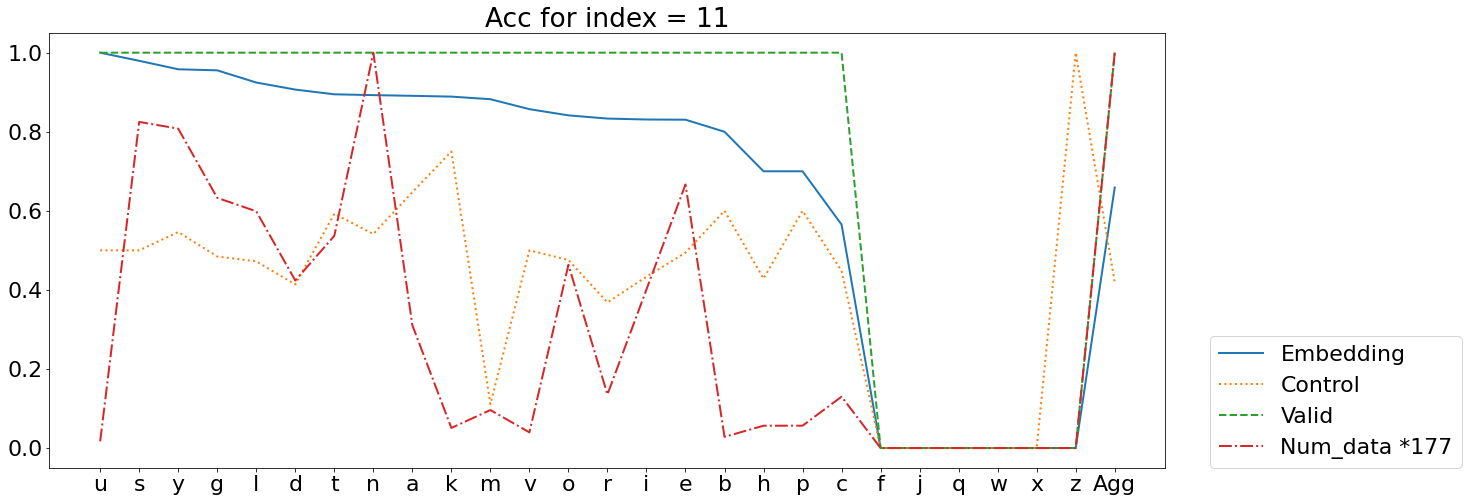

acc {'a': 91.67, 'b': 100.0, 'c': 80.0, 'd': 92.5, 'e': 73.33, 'f': 0.0, 'g': 100.0, 'h': 100.0, 'i': 100.0, 'j': 0.0, 'k': 100.0, 'l': 84.29, 'm': 0.0, 'n': 88.46, 'o': 85.71, 'p': 25.0, 'q': 0.0, 'r': 80.0, 's': 97.78, 't': 66.67, 'u': 100.0, 'v': 75.0, 'w': 50.0, 'x': 0.0, 'y': 95.29, 'z': 0.0} , Aggr: 89.0

ctl_acc {'a': 52.63, 'b': 0.0, 'c': 40.0, 'd': 35.14, 'e': 41.86, 'f': 50.0, 'g': 56.0, 'h': 33.33, 'i': 69.23, 'j': 0.0, 'k': 100.0, 'l': 60.0, 'm': 100.0, 'n': 51.39, 'o': 45.83, 'p': 50.0, 'q': 0.0, 'r': 56.25, 's': 50.0, 't': 84.21, 'u': 22.22, 'v': 60.0, 'w': 0.0, 'x': 0.0, 'y': 45.16, 'z': 0.0} , Aggr: 50.95

tp {'a': (22, [('ĠPsychological', 1, 1), ('Ġmitochondrial', 1, 1), ('Ġenvironmentally', 1, 1), ('Ġencyclopedia', 1, 1), ('Ġunintentional', 1, 1)]), 'b': (1, [('Ġunderstandably', 1, 1)]), 'c': (4, [('Ġenthusiastic', 1, 1), ('Ġpornographic', 1, 1), ('Ġmethodological', 1, 1), ('Ġmethodological', 1, 1)]), 'd': (37, [('Ġphotographed', 1, 1), ('Ġconcentrated', 1, 1), ('Ġpar

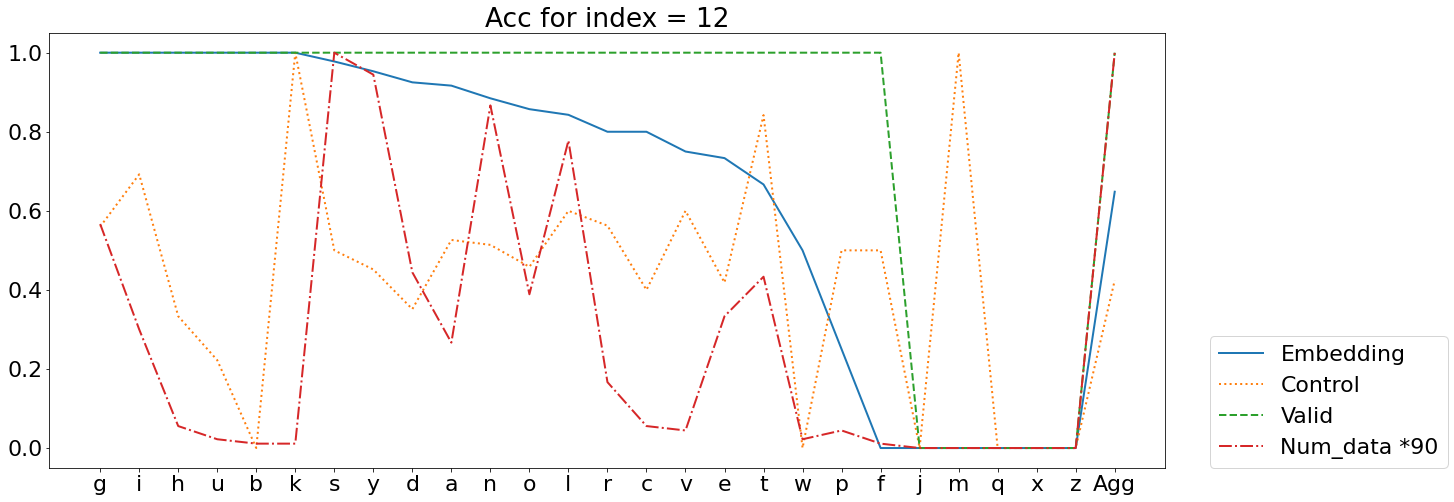

acc {'a': 100.0, 'b': 0.0, 'c': 0.0, 'd': 84.62, 'e': 77.78, 'f': 0.0, 'g': 100.0, 'h': 100.0, 'i': 66.67, 'j': 0.0, 'k': 0.0, 'l': 88.0, 'm': 0.0, 'n': 90.91, 'o': 87.5, 'p': 0.0, 'q': 0.0, 'r': 0.0, 's': 100.0, 't': 70.0, 'u': 0.0, 'v': 66.67, 'w': 0.0, 'x': 0.0, 'y': 96.36, 'z': 0.0} , Aggr: 90.69

ctl_acc {'a': 66.67, 'b': 100.0, 'c': 0.0, 'd': 44.44, 'e': 69.23, 'f': 0.0, 'g': 45.83, 'h': 0.0, 'i': 50.0, 'j': 0.0, 'k': 0.0, 'l': 61.11, 'm': 50.0, 'n': 50.0, 'o': 40.0, 'p': 0.0, 'q': 0.0, 'r': 0.0, 's': 56.67, 't': 77.78, 'u': 0.0, 'v': 100.0, 'w': 0.0, 'x': 0.0, 'y': 47.37, 'z': 0.0} , Aggr: 52.97

tp {'a': (8, [('Ġconstitutionally', 1, 1), ('Ġschizophrenia', 1, 1), ('ĠTelecommunications', 1, 1), ('Ġmethodological', 1, 1), ('Ġconstitutionally', 1, 1)]), 'b': (0, []), 'c': (0, []), 'd': (11, [('Ġauthenticated', 1, 1), ('Ġreconstructed', 1, 1), ('Ġunaccompanied', 1, 1), ('Ġuninterrupted', 1, 1), ('Ġcongratulated', 1, 1)]), 'e': (7, [('Ġinappropriate', 1, 1), ('Ġinappropriately', 1, 

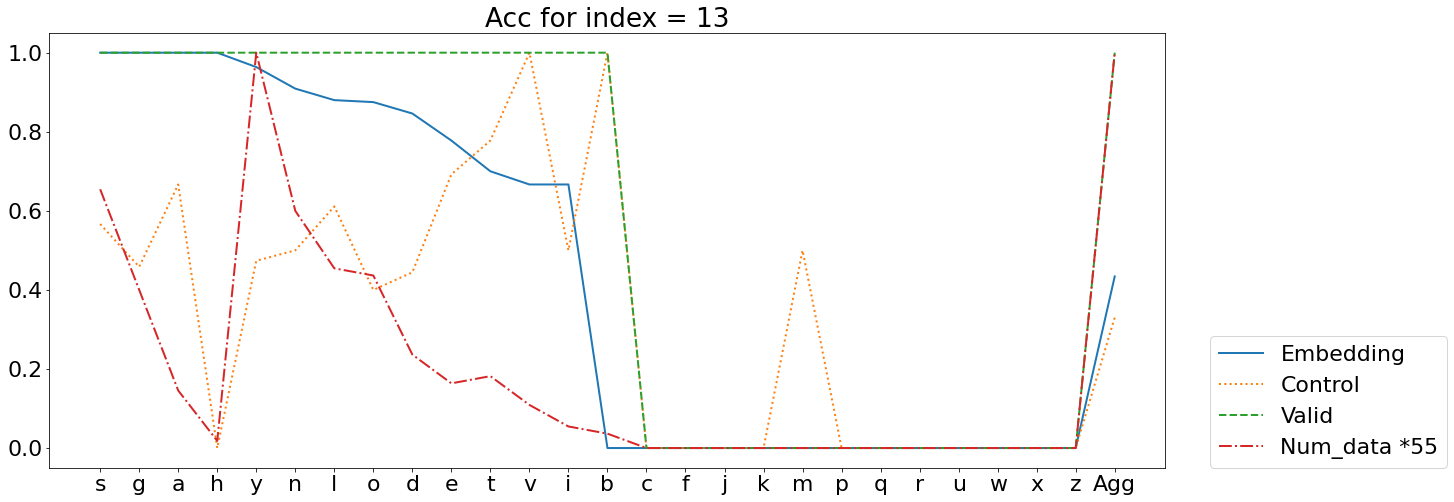

acc {'a': 100.0, 'b': 100.0, 'c': 0.0, 'd': 50.0, 'e': 80.0, 'f': 0.0, 'g': 100.0, 'h': 0.0, 'i': 100.0, 'j': 0.0, 'k': 0.0, 'l': 81.82, 'm': 0.0, 'n': 88.89, 'o': 100.0, 'p': 0.0, 'q': 0.0, 'r': 0.0, 's': 100.0, 't': 66.67, 'u': 0.0, 'v': 0.0, 'w': 0.0, 'x': 0.0, 'y': 100.0, 'z': 0.0} , Aggr: 91.67

ctl_acc {'a': 100.0, 'b': 0.0, 'c': 0.0, 'd': 50.0, 'e': 66.67, 'f': 0.0, 'g': 0.0, 'h': 100.0, 'i': 66.67, 'j': 0.0, 'k': 50.0, 'l': 80.0, 'm': 0.0, 'n': 20.0, 'o': 37.5, 'p': 0.0, 'q': 0.0, 'r': 0.0, 's': 40.0, 't': 50.0, 'u': 0.0, 'v': 0.0, 'w': 0.0, 'x': 0.0, 'y': 53.33, 'z': 0.0} , Aggr: 48.39

tp {'a': (3, [('Ġindistinguishable', 1, 1), ('Ġentrepreneurial', 1, 1), ('Ġdisproportionately', 1, 1)]), 'b': (2, [('Ġincomprehensible', 1, 1), ('Ġincomprehensible', 1, 1)]), 'c': (0, []), 'd': (1, [('Ġaforementioned', 1, 1)]), 'e': (4, [('Ġadministrative', 1, 1), ('Ġtransformative', 1, 1), ('Ġadministrative', 1, 1), ('Ġtransformative', 1, 1)]), 'f': (0, []), 'g': (2, [('Ġdiscriminating', 1, 1)

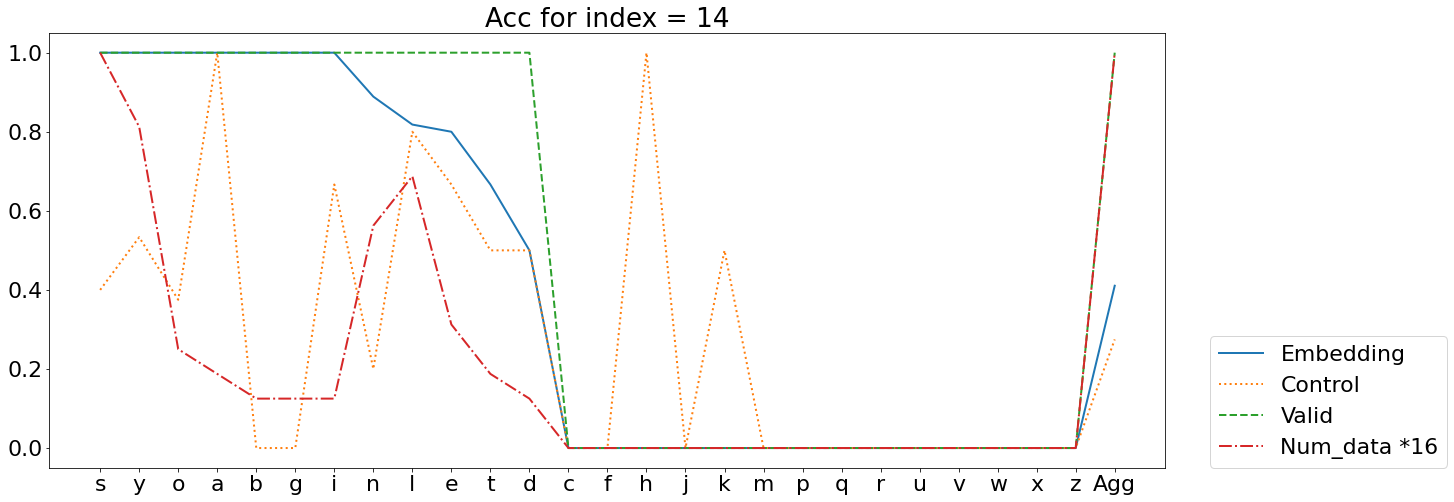

acc {'a': 100.0, 'b': 33.33, 'c': 0.0, 'd': 33.33, 'e': 66.67, 'f': 0.0, 'g': 50.0, 'h': 0.0, 'i': 0.0, 'j': 0.0, 'k': 0.0, 'l': 71.43, 'm': 33.33, 'n': 100.0, 'o': 0.0, 'p': 0.0, 'q': 0.0, 'r': 0.0, 's': 94.12, 't': 0.0, 'u': 0.0, 'v': 0.0, 'w': 0.0, 'x': 0.0, 'y': 78.57, 'z': 0.0} , Aggr: 62.12

ctl_acc {'a': 100.0, 'b': 100.0, 'c': 0.0, 'd': 66.67, 'e': 66.67, 'f': 0.0, 'g': 66.67, 'h': 100.0, 'i': 40.0, 'j': 0.0, 'k': 0.0, 'l': 0.0, 'm': 50.0, 'n': 75.0, 'o': 100.0, 'p': 66.67, 'q': 0.0, 'r': 50.0, 's': 72.73, 't': 0.0, 'u': 0.0, 'v': 0.0, 'w': 0.0, 'x': 0.0, 'y': 66.67, 'z': 0.0} , Aggr: 59.38

tp {'a': (1, [('Ġunconstitutional', 1, 1)]), 'b': (1, [('Ġindistinguishable', 1, 1)]), 'c': (0, []), 'd': (2, [('Ġstraightforward', 1, 1), ('Ġstraightforward', 1, 1)]), 'e': (2, [('Ġindistinguishable', 1, 1), ('Ġdisproportionately', 1, 1)]), 'f': (0, []), 'g': (1, [('ĠNotwithstanding', 1, 1)]), 'h': (0, []), 'i': (0, []), 'j': (0, []), 'k': (0, []), 'l': (5, [('Ġunconstitutional', 1, 1), ('

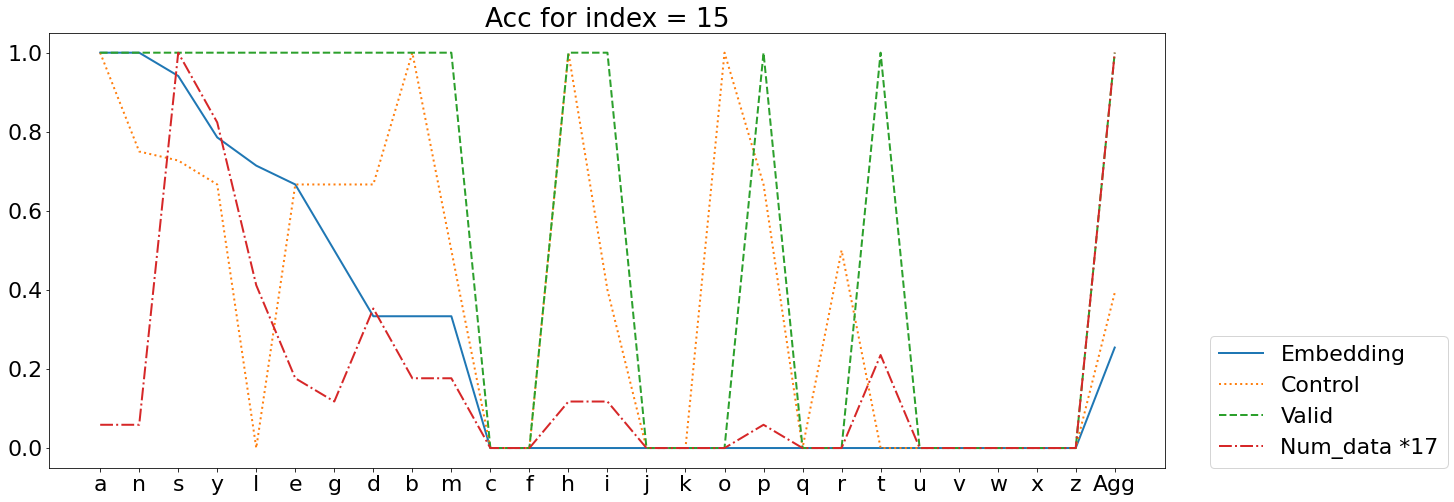

In [29]:
sort = True
sort_by = 1

for l in range(max_len):
    print("acc", {c: round(acc[c][l]*100, 2) for c in string.ascii_lowercase},
                  f', Aggr: {round(100*sum([tp_num[c][l] for c in string.ascii_lowercase])/sum([tp_num[c][l] + fn_num[c][l] for c in string.ascii_lowercase]), 2)}')
    print()
    print("ctl_acc", {c: round(ctl_acc[c][l]*100, 2) for c in string.ascii_lowercase},
                  f', Aggr: {round(100*sum([ctl_tp_num[c][l] for c in string.ascii_lowercase])/sum([ctl_tp_num[c][l] + ctl_fn_num[c][l] for c in string.ascii_lowercase]), 2)}')
    print()
    print("tp", {c: (tp_num[c][l], tp_eg[c][l]) for c in string.ascii_lowercase})
    print()
    print("fn", {c: (fn_num[c][l], fn_eg[c][l]) for c in string.ascii_lowercase})
    print()
    print("ctl_tp", {c: ctl_tp_num[c][l] for c in string.ascii_lowercase})
    print()
    print("ctl_fn", {c: ctl_fn_num[c][l] for c in string.ascii_lowercase})
    print()

    this_acc     = [acc[c][l] for c in string.ascii_lowercase]
    ctrl_acc  = [ctl_acc[c][l] for c in string.ascii_lowercase]
    valid_l      = [min(1, (tp_num[c][l]+fn_num[c][l])) for c in string.ascii_lowercase]
    num_data_l_o = [(tp_num[c][l]+fn_num[c][l]) for c in string.ascii_lowercase]
    num_data_l   = [x/max(1, max(num_data_l_o)) for x in num_data_l_o]

    sorted_indices = sorted(list(range(len(this_acc))), key = lambda x: -this_acc[x])
    sort_it = lambda x: x
    if sort == False:
        sorted_indices = list(range(len(this_acc)))
    elif sort_by == 1:
        sort_it = lambda x: [x[y] for y in sorted_indices]
    else:
        sorted_indices = sorted(list(range(len(num_data_l))), key = lambda x: -num_data_l[x])
        sort_it = lambda x: [x[y] for y in sorted_indices]

    fig, ax = plt.subplots()
    plt.plot(sort_it(this_acc) + [sum(this_acc)/len(this_acc)], linestyle='-' , linewidth=2, label='Embedding')
    plt.plot(sort_it(ctrl_acc) + [sum(ctrl_acc)/len(ctrl_acc)], linestyle=':' , linewidth=2, label='Control')
    plt.plot(sort_it(valid_l) + [max(valid_l)], linestyle='--' , linewidth=2, label='Valid')
    plt.plot(sort_it(num_data_l) + [max(num_data_l)], linestyle='-.' , linewidth=2, label='Num_data *' + str(max(num_data_l_o)))
    # ax.plot([3,3.1,3,3.1,3], linestyle='-.' , linewidth=4, label='3')
    # ax.plot([4,4.1,4,4.1,4], linestyle=':' , linewidth=4, label='1')
    ax.set_xticks(range(0,27))
    ax.set_xticklabels(sort_it(list(string.ascii_lowercase))+['Agg'])

    # plt.axis('off')
    plt.title('Acc for index = ' + str(l))
    plt.legend(loc=(1.04,0))
    plt.show()


In [38]:
num_data

{'a': {0: 1736,
  1: 3505,
  2: 5402,
  3: 3080,
  4: 1599,
  5: 1297,
  6: 986,
  7: 715,
  8: 371,
  9: 274,
  10: 96,
  11: 55,
  12: 24,
  13: 8,
  14: 3,
  15: 1},
 'b': {0: 362,
  1: 1191,
  2: 418,
  3: 705,
  4: 358,
  5: 267,
  6: 175,
  7: 115,
  8: 87,
  9: 33,
  10: 15,
  11: 5,
  12: 1,
  13: 2,
  14: 2,
  15: 3},
 'c': {0: 623,
  1: 2797,
  2: 1092,
  3: 1662,
  4: 1214,
  5: 822,
  6: 577,
  7: 352,
  8: 266,
  9: 114,
  10: 67,
  11: 23,
  12: 5,
  13: 0,
  14: 0,
  15: 0},
 'd': {0: 266,
  1: 1739,
  2: 736,
  3: 1299,
  4: 1336,
  5: 887,
  6: 896,
  7: 587,
  8: 510,
  9: 335,
  10: 189,
  11: 75,
  12: 40,
  13: 13,
  14: 2,
  15: 6},
 'e': {0: 936,
  1: 3204,
  2: 6018,
  3: 3043,
  4: 3562,
  5: 3216,
  6: 1668,
  7: 1043,
  8: 645,
  9: 440,
  10: 198,
  11: 118,
  12: 30,
  13: 9,
  14: 5,
  15: 3},
 'f': {0: 251,
  1: 1001,
  2: 223,
  3: 482,
  4: 370,
  5: 200,
  6: 192,
  7: 59,
  8: 32,
  9: 8,
  10: 2,
  11: 0,
  12: 1,
  13: 0,
  14: 0,
  15: 0},
 'g': {0

In [39]:
mean = lambda x: sum(x)/len(x)

headers = ['length', 'gptj_recall', "control_recall", 'num_data']
rows = []
for l in range(max_len):
    f1_aggr = sum(acc[c][l] for c in string.ascii_lowercase)/(sum([num_data[c][l] != 0 for c in string.ascii_lowercase])+0.000001)
    ctrl_aggr = sum(ctl_acc[c][l] for c in string.ascii_lowercase)/(sum([num_data[c][l] != 0 for c in string.ascii_lowercase])+0.000001)
    num_data_aggr = sum(num_data[c][l] for c in string.ascii_lowercase)
    rows.append([l] + [f1_aggr, ctrl_aggr, num_data_aggr])
rows = [headers] + rows


In [40]:
open('performance_vs_char_position.csv' ,'w+').write('\n'.join([','.join([str(cell) for cell in row]) for row in rows]))

769

acc {'a': 86.12, 'b': 90.16, 'c': 84.64, 'd': 87.4, 'e': 85.19, 'f': 94.79, 'g': 89.47, 'h': 89.56, 'i': 89.87, 'j': 94.6, 'k': 96.15, 'l': 89.74, 'm': 94.62, 'n': 87.25, 'o': 87.37, 'p': 92.14, 'q': 94.33, 'r': 91.76, 's': 92.46, 't': 88.07, 'u': 81.02, 'v': 93.06, 'w': 94.48, 'x': 94.2, 'y': 92.59, 'z': 92.96} , Aggr: 88.74

ctl_acc {'a': 56.6, 'b': 51.22, 'c': 49.29, 'd': 49.61, 'e': 50.26, 'f': 51.11, 'g': 48.53, 'h': 52.19, 'i': 52.56, 'j': 65.71, 'k': 56.01, 'l': 52.32, 'm': 47.31, 'n': 52.85, 'o': 48.81, 'p': 57.65, 'q': 41.44, 'r': 49.62, 's': 51.41, 't': 54.77, 'u': 45.46, 'v': 53.28, 'w': 54.36, 'x': 49.79, 'y': 53.75, 'z': 43.65} , Aggr: 51.63

tp {'a': 16493, 'b': 3371, 'c': 8137, 'd': 7793, 'e': 20564, 'f': 2674, 'g': 5691, 'h': 5104, 'i': 16516, 'j': 368, 'k': 2173, 'l': 10253, 'm': 6016, 'n': 14526, 'o': 12882, 'p': 5954, 'q': 399, 'r': 16472, 's': 14712, 't': 14419, 'u': 6750, 'v': 2818, 'w': 1884, 'x': 877, 'y': 3896, 'z': 581}

fn {'a': 2659, 'b': 368, 'c': 1477, 'd':

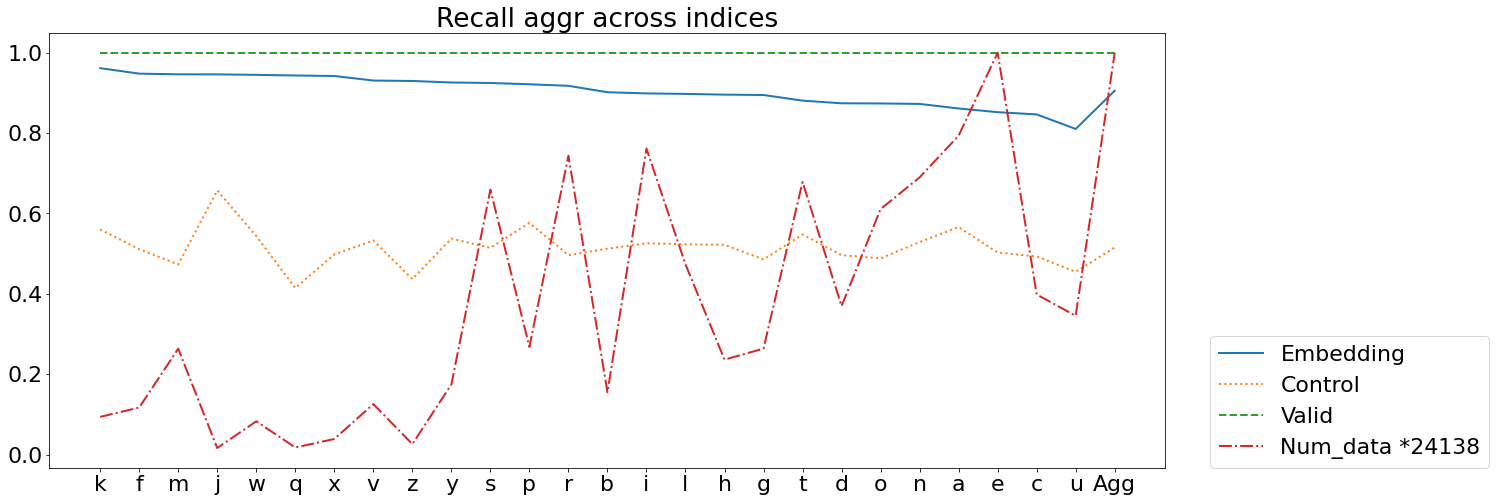

In [12]:
sort = True
sort_by = 1

del l
acc = {c: sum([tp_num[c][l]
            for l in range(max_len)])/sum(
                        [tp_num[c][l] + fn_num[c][l]
                         for l in range(max_len)])
       for c in string.ascii_lowercase}

ctl_acc = {c: sum([ctl_tp_num[c][l]
            for l in range(max_len)])/sum(
                        [ctl_tp_num[c][l] + ctl_fn_num[c][l]
                         for l in range(max_len)])
       for c in string.ascii_lowercase}

tp_num = {c: sum([tp_num[c][l] for l in range(max_len)]) for c in string.ascii_lowercase}
fn_num = {c: sum([fn_num[c][l] for l in range(max_len)]) for c in string.ascii_lowercase}
ctl_tp_num = {c: sum([ctl_tp_num[c][l] for l in range(max_len)]) for c in string.ascii_lowercase}
ctl_fn_num = {c: sum([ctl_fn_num[c][l] for l in range(max_len)]) for c in string.ascii_lowercase}

print("acc", {c: round(acc[c]*100, 2) for c in string.ascii_lowercase},
                  f', Aggr: {round(100*sum([tp_num[c] for c in string.ascii_lowercase])/sum([tp_num[c] + fn_num[c] for c in string.ascii_lowercase]), 2)}')
print()
print("ctl_acc", {c: round(ctl_acc[c]*100, 2) for c in string.ascii_lowercase},
                  f', Aggr: {round(100*sum([ctl_tp_num[c] for c in string.ascii_lowercase])/sum([ctl_tp_num[c] + ctl_fn_num[c] for c in string.ascii_lowercase]), 2)}')
print()
print("tp", {c: tp_num[c] for c in string.ascii_lowercase})
print()
print("fn", {c: fn_num[c] for c in string.ascii_lowercase})
print()
print("ctl_tp", {c: ctl_tp_num[c] for c in string.ascii_lowercase})
print()
print("ctl_fn", {c: ctl_fn_num[c] for c in string.ascii_lowercase})
print()

this_acc     = [acc[c] for c in string.ascii_lowercase]
ctrl_acc  = [ctl_acc[c] for c in string.ascii_lowercase]
valid_l      = [min(1, (tp_num[c] + fn_num[c])) for c in string.ascii_lowercase]
num_data_l_o = [(tp_num[c] + fn_num[c]) for c in string.ascii_lowercase]
num_data_l   = [x/max(1, max(num_data_l_o)) for x in num_data_l_o]

sorted_indices = sorted(list(range(len(this_acc))), key = lambda x: -this_acc[x])
sort_it = lambda x: x
if sort == False:
    sorted_indices = list(range(len(this_acc)))
elif sort_by == 1:
    sort_it = lambda x: [x[y] for y in sorted_indices]
else:
    sorted_indices = sorted(list(range(len(num_data_l))), key = lambda x: -num_data_l[x])
    sort_it = lambda x: [x[y] for y in sorted_indices]

fig, ax = plt.subplots()
plt.plot(sort_it(this_acc) + [sum(this_acc)/len(this_acc)], linestyle='-' , linewidth=2, label='Embedding')
plt.plot(sort_it(ctrl_acc) + [sum(ctrl_acc)/len(ctrl_acc)], linestyle=':' , linewidth=2, label='Control')
plt.plot(sort_it(valid_l) + [max(valid_l)], linestyle='--' , linewidth=2, label='Valid')
plt.plot(sort_it(num_data_l) + [max(num_data_l)], linestyle='-.' , linewidth=2, label='Num_data *' + str(max(num_data_l_o)))
# ax.plot([3,3.1,3,3.1,3], linestyle='-.' , linewidth=4, label='3')
# ax.plot([4,4.1,4,4.1,4], linestyle=':' , linewidth=4, label='1')
ax.set_xticks(range(0,27))
ax.set_xticklabels(sort_it(list(string.ascii_lowercase))+['Agg'])

# plt.axis('off')
plt.title('Recall aggr across indices')
plt.legend(loc=(1.04,0))
plt.show()


In [17]:
acc

{'a': 0.8611633249791144,
 'b': 0.901577962021931,
 'c': 0.8463698772623258,
 'd': 0.8740466576940332,
 'e': 0.851934708757975,
 'f': 0.9478908188585607,
 'g': 0.8946706492689829,
 'h': 0.8955957185471135,
 'i': 0.8986832081836978,
 'j': 0.9460154241645244,
 'k': 0.9615044247787611,
 'l': 0.897417943107221,
 'm': 0.9462094998427178,
 'n': 0.872537241710716,
 'o': 0.8736520854526958,
 'p': 0.9213865676261219,
 'q': 0.9432624113475178,
 'r': 0.9175579322638147,
 's': 0.9245852187028658,
 't': 0.8807109699486929,
 'u': 0.8102268635217861,
 'v': 0.9306472919418758,
 'w': 0.9448345035105316,
 'x': 0.9419978517722879,
 'y': 0.9258555133079848,
 'z': 0.9296}

In [1]:
open('performance_vs_token_frequency.csv' ,'w+').write('\n'.join([','.join([str(cell) for cell in row]) for row in rows]))

NameError: name 'rows' is not defined